# Generic

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from math import sqrt


In [2]:
df = pd.read_csv("./dataset.csv")

def get_num_df(df):
    return df.select_dtypes(include=["int64", "float64"])


## Normalization

In [3]:
scaler = MinMaxScaler()
norm_df_num = pd.DataFrame(
    scaler.fit_transform(get_num_df(df)), columns=get_num_df(df).columns
)
norm_df_num.describe()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.297706,0.266050,0.317810,0.705602,0.258044,0.701609,0.263067
std,0.186026,0.150370,0.143414,0.147244,0.161733,0.117358,0.131701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.161981,0.155267,0.216317,0.640756,0.140331,0.638749,0.167095
50%,0.255247,0.236080,0.298761,0.733812,0.220218,0.718859,0.240747
75%,0.379859,0.348025,0.390682,0.805095,0.326235,0.779492,0.331612
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation analysis

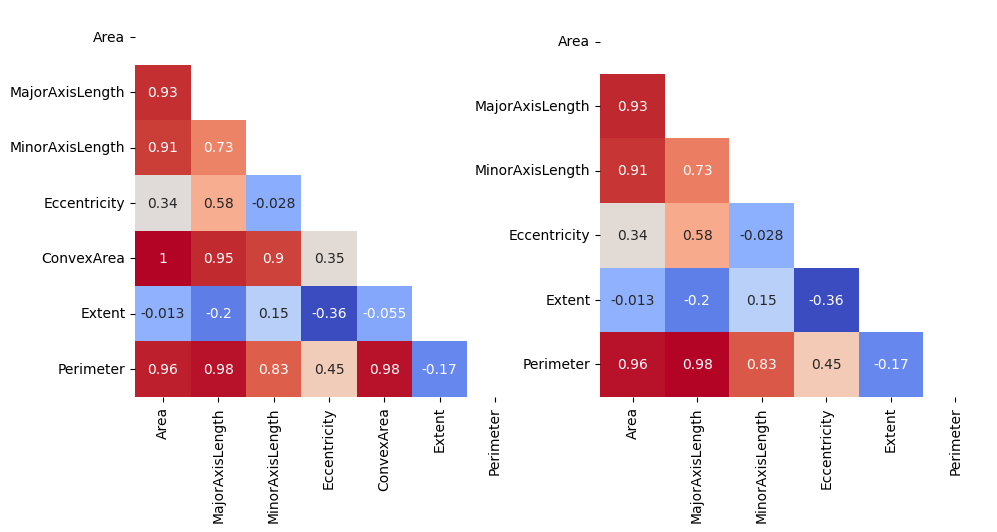

In [4]:
corr = norm_df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 9))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cbar=False,
    ax=ax1,
    cmap="coolwarm",
    square=True,
)

norm_df2_num = norm_df_num.drop(columns="ConvexArea", axis=1)

corr = norm_df2_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cbar=False,
    ax=ax2,
    cmap="coolwarm",
    square=True,
)

plt.show()


## Save Cleaned

In [5]:
final_df = norm_df2_num.copy()
final_df["Class"] = df["Class"]

final_df.to_csv("./cleaned_dataset.csv", index=False)


## Optimal Cluster Number

In [6]:
df_cur = norm_df2_num.copy()

# Empirical Method
num_rows = df_cur.shape[0]
k_empirical = int(sqrt(num_rows / 2))
print(f"Empirical method suggests {k_empirical} clusters")


Empirical method suggests 21 clusters


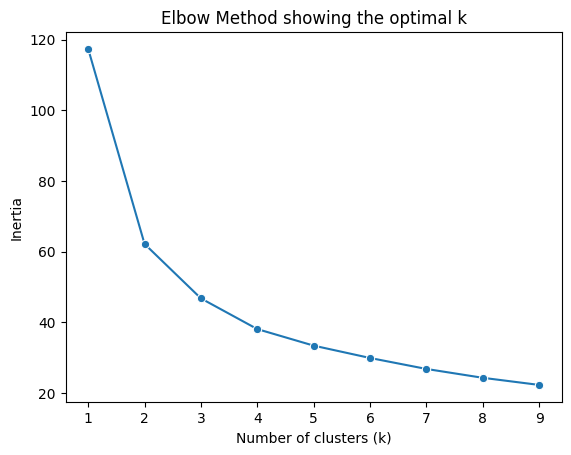

In [7]:
# Elbow Method
inertia = []
K = range(
    1, 10
)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cur)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
# plt.figure(figsize=(16, 8))
sns.lineplot(x=K, y=inertia, marker="o")
plt.title("Elbow Method showing the optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


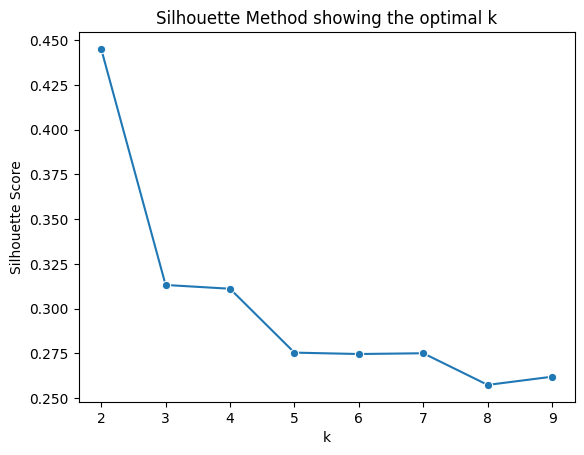

In [8]:
# Average Silhouette Method
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cur)
    if k == 1:
        continue  # silhouette_score requires more than one cluster to work
    score = silhouette_score(df_cur, kmeans.labels_)
    silhouette_scores.append(score)

# plt.figure(figsize=(16, 8))
sns.lineplot(x=K[1:], y=silhouette_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method showing the optimal k")
plt.show()
